<a href="https://colab.research.google.com/github/tsengcc2023/Financial-Big-Data-Analysis/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
pip install yfinance requests pandas matplotlib

# 單隻股票

## 下載股票歷史數據


In [40]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
# 下載台積電 (2330.TW) 的股價歷史數據
stock_data = yf.download('2330.TW', start='2020-01-01', end='2024-12-31')

[*********************100%***********************]  1 of 1 completed


## 計算移動平均線 (MA)


In [21]:
# 計算 50 日與 200 日移動平均
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

## 計算相對強弱指標 (RSI)

In [22]:
# 計算 RSI (14日)
delta = stock_data['Close'].diff()  # 計算價格差異
gain = delta.where(delta > 0, 0)  # 上漲的部分
loss = -delta.where(delta < 0, 0)  # 下跌的部分

# 計算平均漲幅與跌幅
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()

# 計算相對強弱 (RS)
rs = average_gain / average_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

## 計算移動平均收斂擴散指標 (MACD)

In [23]:
# 計算 MACD (12日與26日EMA的差)
fast_ema = stock_data['Close'].ewm(span=12, adjust=False).mean()  # 12日 EMA
slow_ema = stock_data['Close'].ewm(span=26, adjust=False).mean()  # 26日 EMA
stock_data['MACD'] = fast_ema - slow_ema

# 計算 MACD Signal Line (9日 EMA)
stock_data['MACD_Signal'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

## 可視化

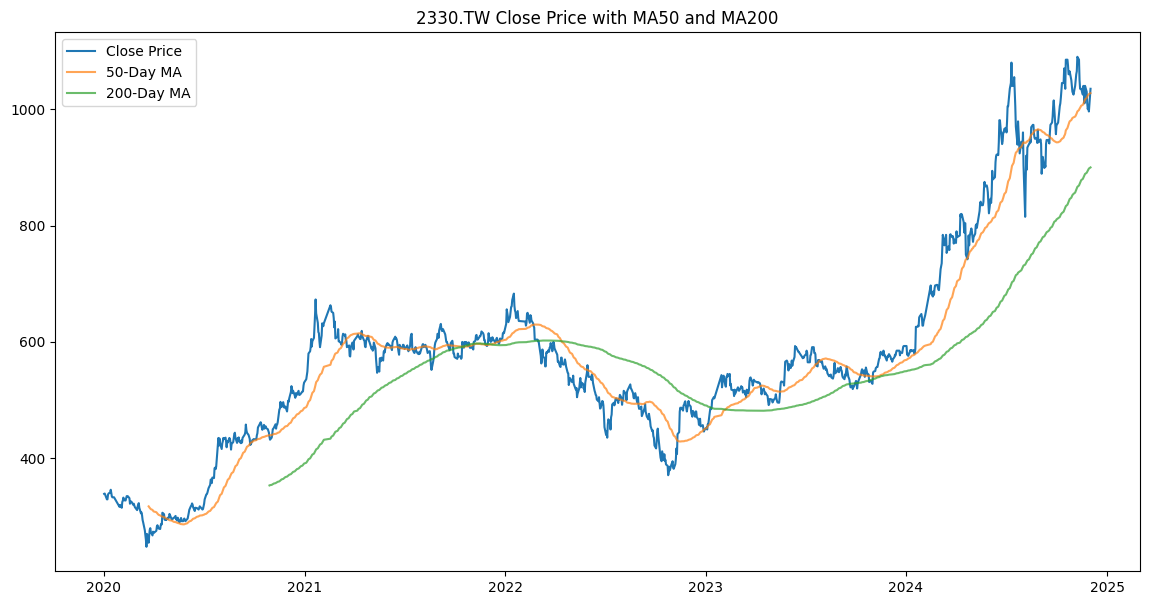

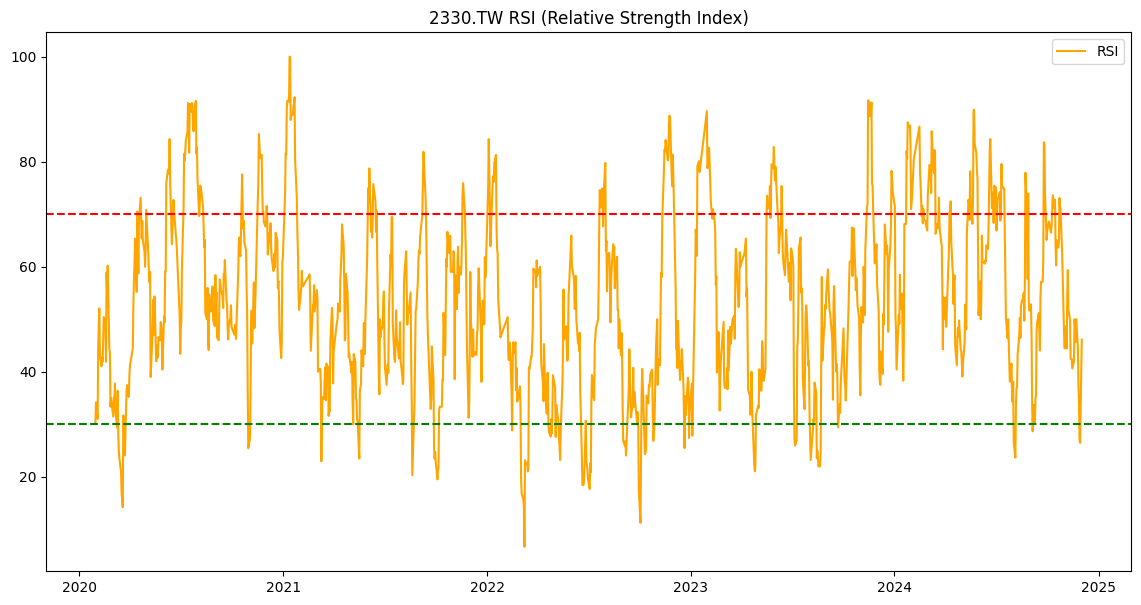

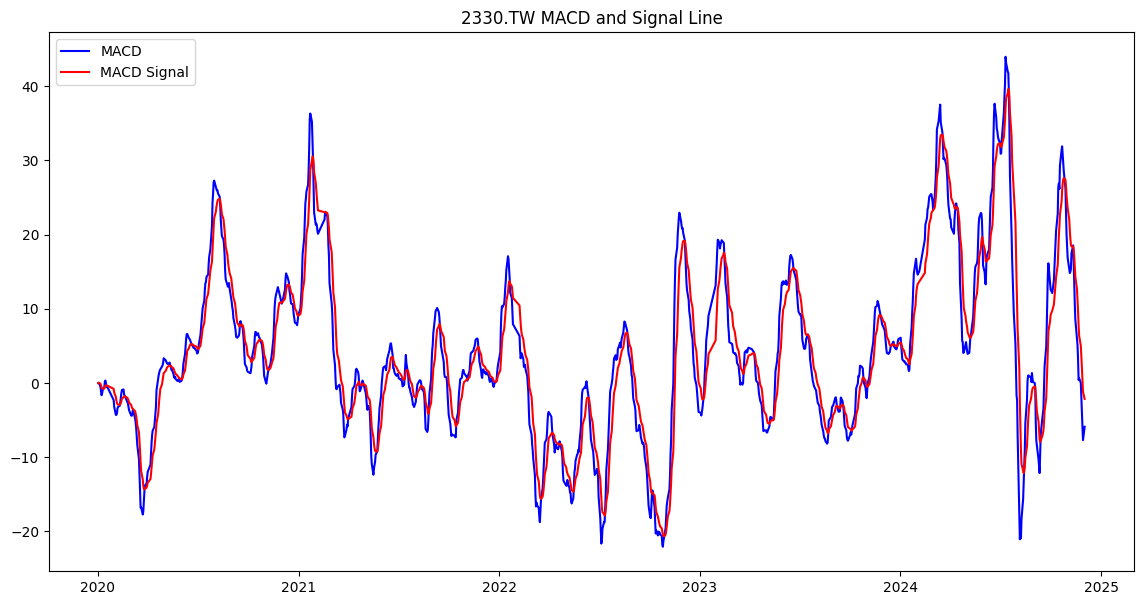

In [24]:
# 繪製股價與移動平均線
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['MA50'], label='50-Day MA', alpha=0.7)
plt.plot(stock_data['MA200'], label='200-Day MA', alpha=0.7)
plt.title('2330.TW Close Price with MA50 and MA200')
plt.legend()
plt.show()

# 繪製 RSI 指標
plt.figure(figsize=(14, 7))
plt.plot(stock_data['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red')  # 超買區域
plt.axhline(30, linestyle='--', color='green')  # 超賣區域
plt.title('2330.TW RSI (Relative Strength Index)')
plt.legend()
plt.show()

# 繪製 MACD 和 Signal Line
plt.figure(figsize=(14, 7))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['MACD_Signal'], label='MACD Signal', color='red')
plt.title('2330.TW MACD and Signal Line')
plt.legend()
plt.show()

## RSI指標建議

In [27]:
# 基於 RSI 指標生成簡單的買賣建議
latest_rsi = stock_data['RSI'].iloc[-1]
if latest_rsi < 30:
    print("RSI 顯示該股票可能被過度賣出，這可能是買進的機會。")
elif latest_rsi > 70:
    print("RSI 顯示該股票可能被過度買入，這可能是賣出的機會。")
else:
    print("RSI 顯示中性，沒有強烈的買賣信號。")

RSI 顯示中性，沒有強烈的買賣信號。


## ＭA交叉建議

In [28]:
# 基於 MA 交叉生成投資建議
if stock_data['MA50'].iloc[-1] > stock_data['MA200'].iloc[-1]:
    print("黃金交叉：建議買入（MA50高於MA200）。")
elif stock_data['MA50'].iloc[-1] < stock_data['MA200'].iloc[-1]:
    print("死亡交叉：建議賣出（MA50低於MA200）。")
else:
    print("無明顯交叉：建議持有。")

黃金交叉：建議買入（MA50高於MA200）。


## MACD指標建議

In [29]:
# 基於 MACD 交叉生成買賣建議
if stock_data['MACD'].iloc[-1] > stock_data['MACD_Signal'].iloc[-1]:
    print("MACD 線突破 Signal 線：建議買入。")
elif stock_data['MACD'].iloc[-1] < stock_data['MACD_Signal'].iloc[-1]:
    print("MACD 線跌破 Signal 線：建議賣出。")
else:
    print("MACD 與 Signal 線相交，無明確買賣信號。")

MACD 線跌破 Signal 線：建議賣出。


## 結合RSI、MA交叉、MACD 綜合建議

In [30]:
# 綜合多個技術指標生成投資建議
if latest_rsi < 30 and stock_data['MA50'].iloc[-1] > stock_data['MA200'].iloc[-1] and stock_data['MACD'].iloc[-1] > stock_data['MACD_Signal'].iloc[-1]:
    print("綜合指標顯示：強烈買入信號。")
elif latest_rsi > 70 and stock_data['MA50'].iloc[-1] < stock_data['MA200'].iloc[-1] and stock_data['MACD'].iloc[-1] < stock_data['MACD_Signal'].iloc[-1]:
    print("綜合指標顯示：強烈賣出信號。")
else:
    print("綜合指標顯示：持有觀望。")

綜合指標顯示：持有觀望。


# 多隻股票

## 下載股票歷史數據

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定義股票代碼列表
stocks = ['2330.TW', '2317.TW', '6505.TW', '3008.TW']  # 可以更換為您感興趣的股票代碼

In [33]:
# 設定時間區間，這裡以過去1年的資料為例
start_date = "2023-01-01"
end_date = "2024-01-01"

# 下載每隻股票的歷史數據
def get_stock_data(stock_symbol):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# 收集所有股票的數據
stock_data_dict = {}
for stock in stocks:
    stock_data_dict[stock] = get_stock_data(stock)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 計算移動平均線 (MA)

In [34]:
# 計算50日與200日移動平均線
def calculate_ma(stock_data, short_window=50, long_window=200):
    stock_data['MA50'] = stock_data['Close'].rolling(window=short_window).mean()
    stock_data['MA200'] = stock_data['Close'].rolling(window=long_window).mean()

## 計算相對強弱指標 (RSI)

In [35]:
# 計算RSI（14日）
def calculate_rsi(stock_data, window=14):
    delta = stock_data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    stock_data['RSI'] = 100 - (100 / (1 + rs))

## 計算移動平均收斂擴散指標 (MACD)

In [36]:
# 計算MACD指標
def calculate_macd(stock_data, fast_period=12, slow_period=26, signal_period=9):
    stock_data['EMA12'] = stock_data['Close'].ewm(span=fast_period, adjust=False).mean()
    stock_data['EMA26'] = stock_data['Close'].ewm(span=slow_period, adjust=False).mean()
    stock_data['MACD'] = stock_data['EMA12'] - stock_data['EMA26']
    stock_data['MACD_Signal'] = stock_data['MACD'].ewm(span=signal_period, adjust=False).mean()

## 計算每隻股票的技術指標

In [37]:
# 為每隻股票計算技術指標
for stock, data in stock_data_dict.items():
    calculate_ma(data)
    calculate_rsi(data)
    calculate_macd(data)

## 生成每隻股票的投資建議

In [38]:
# 根據RSI、MA交叉、MACD產生建議
def generate_recommendation(stock_data):
    latest_rsi = stock_data['RSI'].iloc[-1]
    latest_ma50 = stock_data['MA50'].iloc[-1]
    latest_ma200 = stock_data['MA200'].iloc[-1]
    latest_macd = stock_data['MACD'].iloc[-1]
    latest_macd_signal = stock_data['MACD_Signal'].iloc[-1]

    # 根據 RSI 指標建議
    if latest_rsi < 30:
        rsi_advice = "買入"
    elif latest_rsi > 70:
        rsi_advice = "賣出"
    else:
        rsi_advice = "中性"

    # 根據 MA 交叉建議
    if latest_ma50 > latest_ma200:
        ma_advice = "買入（黃金交叉）"
    elif latest_ma50 < latest_ma200:
        ma_advice = "賣出（死亡交叉）"
    else:
        ma_advice = "無明顯交叉"

    # 根據 MACD 交叉建議
    if latest_macd > latest_macd_signal:
        macd_advice = "買入"
    elif latest_macd < latest_macd_signal:
        macd_advice = "賣出"
    else:
        macd_advice = "中性"

    # 綜合建議
    if rsi_advice == "買入" and ma_advice == "買入（黃金交叉）" and macd_advice == "買入":
        return "強烈買入"
    elif rsi_advice == "賣出" or ma_advice == "賣出（死亡交叉）" or macd_advice == "賣出":
        return "賣出"
    else:
        return "持有"

# 為每隻股票生成建議
stock_recommendations = {}
for stock, data in stock_data_dict.items():
    recommendation = generate_recommendation(data)
    stock_recommendations[stock] = recommendation

# 顯示每隻股票的建議
for stock, recommendation in stock_recommendations.items():
    print(f"股票 {stock} 的建議：{recommendation}")

股票 2330.TW 的建議：賣出
股票 2317.TW 的建議：賣出
股票 6505.TW 的建議：賣出
股票 3008.TW 的建議：賣出


## 選擇最佳投資股票

In [39]:
# 根據建議選擇最佳股票
def select_best_stock(stock_recommendations):
    best_stock = None
    for stock, recommendation in stock_recommendations.items():
        if recommendation == "強烈買入":
            best_stock = stock
            break
    return best_stock

best_stock = select_best_stock(stock_recommendations)
if best_stock:
    print(f"推薦的最佳投資股票是：{best_stock}")
else:
    print("目前沒有強烈的買入建議。")

目前沒有強烈的買入建議。
